# 중고차 가격 예측

## #01.패키지 참조

In [41]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), '../../../'))
sys.path.append(work_path)
from helper.regrassion import *
from helper.plot import *
from helper.util import *
from helper.analysis import *
import pandas as pd

## #02. 데이터 불러오기 및 데이터 형태, 독립변수, 종속변수 기술통계량 파악(카테고리 타입 변환)

In [43]:
categories = ['car_name','registration_year','insurance_validity','fuel_type','ownsership','transmission','manufacturing_year','seats']
origin = my_read_csv('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/Used Car Dataset.csv',info=False,categories=categories)
my_pretty_table(origin.head())


카테고리 정보
+----------------------------------------------------------------------+------------+
|                                                                      |   car_name |
|----------------------------------------------------------------------+------------|
| 2017 BMW X1 sDrive20d Expedition                                     |         25 |
| 2014 Hyundai Grand i10 Sportz                                        |         10 |
| 2015 Hyundai Grand i10 Magna                                         |          9 |
| 2012 Honda City V AT                                                 |          8 |
| 2016 Maruti Baleno 1.2 Alpha                                         |          7 |
| 2016 Hyundai Grand i10 Sportz                                        |          7 |
| 2018 Honda WR-V i-VTEC VX                                            |          7 |
| 2016 Hyundai i20 Sportz 1.2                                          |          6 |
| 2015 Honda Brio S MT                       

- registration_year - Third Party insurance 2 , 컬럼명 믿고 월, 일 나와있는 것은 2024년으로 변경
- insurance_validity - petrol 2
- fuel_type - 5 seats 2
- ownsership - cc로 표현된 것 40개 정도
- transmission - 연도 표기 50개 정도,  power Windows 2
- manufacturing_year - power steering 46, power windows 2 air conditioner 2 

In [45]:
df = origin.copy()
df1 = df.drop(df.index[798])
df2 = df1.drop(df.index[818])

In [46]:
df2 = df2[df2.seats != '67000']

In [47]:
df3=df2[~df2['ownsership'].str.contains('cc')]

In [48]:
# 오입력 값 행 삭제 확인
for c in categories:
    my_pretty_table(DataFrame(df3[c].value_counts(), columns=[c]))

+----------------------------------------------------------------------+------------+
|                                                                      |   car_name |
|----------------------------------------------------------------------+------------|
| 2014 Hyundai Grand i10 Sportz                                        |         10 |
| 2015 Hyundai Grand i10 Magna                                         |          9 |
| 2012 Honda City V AT                                                 |          8 |
| 2016 Maruti Baleno 1.2 Alpha                                         |          7 |
| 2016 Hyundai Grand i10 Sportz                                        |          7 |
| 2018 Honda WR-V i-VTEC VX                                            |          7 |
| 2021 Hyundai i20 Asta Opt Turbo DCT BSVI                             |          6 |
| 2016 Hyundai i20 Sportz 1.2                                          |          6 |
| 2015 Honda City i VTEC CVT VX                       

In [50]:
df3[df3.duplicated()]


,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)


In [51]:
# 중복행 제거
df3 = df3[~df3.duplicated()]
df3[df3.duplicated()]


,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)


In [52]:
# 가격 컬럼명 변경(공백 제거)
df3 = df3.rename(columns={'price(in lakhs)':'price'})


In [53]:
# 엔진과 맥스 파워 완전 동일하므로 한 컬럼 제거
df3 = df3.drop('max_power(bhp)',axis=1)
df3.columns

Index(['Unnamed: 0', 'car_name', 'registration_year', 'insurance_validity',
       'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'torque(Nm)',
       'price'],
      dtype='object')

## #03. 데이터 전처리

### [1] 데이터 형식 표준화(행렬이름에 맞는 데이터, 타입변환)하여 기준데이터 확보 

### [2] 이상치 및 결측치 처리(분석목적에 맞는 처리 방법 적용) 

In [54]:
my_outlier_table(df3)

,Q1,Q2,Q3,IQR,UP,DOWN,MAX,MIN
FIELD,,,,,,,,
Unnamed: 0,402.50,789.00,1167.5,765.00,2315.00,-745.00,1.552000e+03,0.00
kms_driven,30000.00,49594.00,70000.0,40000.00,130000.00,-30000.00,8.100000e+05,620.00
mileage(kmpl),16.10,18.76,21.4,5.30,29.35,8.15,3.996000e+03,7.81
engine(cc),1197.00,1493.00,1995.0,798.00,3192.00,0.00,3.258640e+12,5.00
torque(Nm),500.00,1176.00,8850.0,8350.00,21375.00,-12025.00,1.186600e+06,19.00
price,4.62,6.95,16.0,11.38,33.07,-12.45,9.500000e+04,1.00


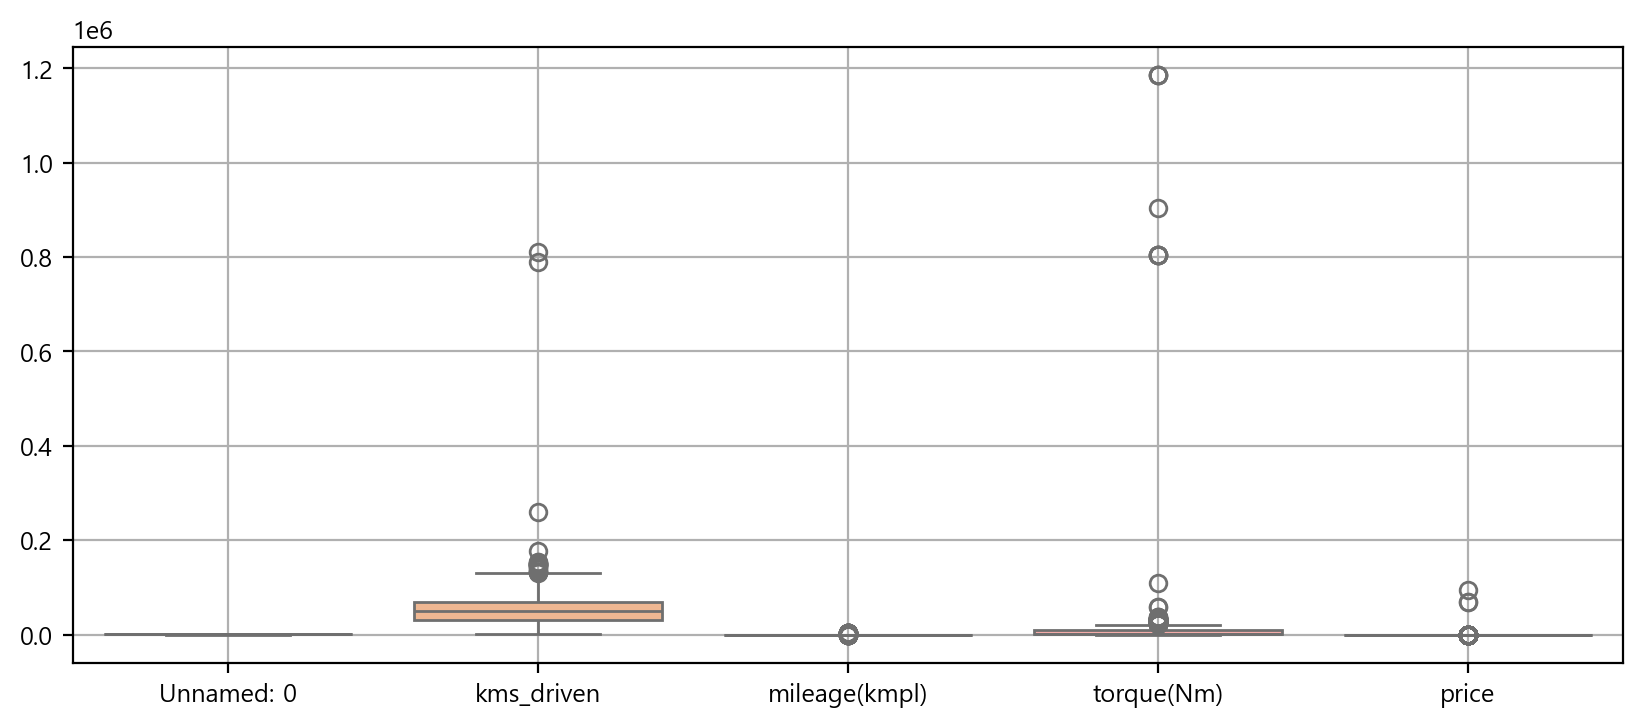

In [55]:
my_boxplot(df3.drop(['engine(cc)'],axis=1))

In [56]:
df3 = df3.reset_index(drop=True)
df3 = df3.drop('Unnamed: 0', axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   car_name            1503 non-null   category
 1   registration_year   1503 non-null   category
 2   insurance_validity  1503 non-null   category
 3   fuel_type           1503 non-null   category
 4   seats               1503 non-null   category
 5   kms_driven          1503 non-null   int64   
 6   ownsership          1503 non-null   category
 7   transmission        1503 non-null   category
 8   manufacturing_year  1503 non-null   category
 9   mileage(kmpl)       1500 non-null   float64 
 10  engine(cc)          1500 non-null   float64 
 11  torque(Nm)          1499 non-null   float64 
 12  price               1503 non-null   float64 
dtypes: category(8), float64(4), int64(1)
memory usage: 121.2 KB


In [57]:
# 이상치를 결측치로 대체
df4 = my_replace_outliner_to_nan(df3)
df4.isnull().sum()

kms_driven             24
mileage(kmpl)         190
engine(cc)            121
torque(Nm)             92
price                 203
car_name                0
registration_year       0
insurance_validity      0
fuel_type               0
seats                   0
ownsership              0
transmission            0
manufacturing_year      0
dtype: int64

In [58]:
# 결측치 제거
df4 = df4.dropna()
df4.isnull().sum()
df4 = df4.reset_index(drop=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   kms_driven          1081 non-null   float64 
 1   mileage(kmpl)       1081 non-null   float64 
 2   engine(cc)          1081 non-null   float64 
 3   torque(Nm)          1081 non-null   float64 
 4   price               1081 non-null   float64 
 5   car_name            1081 non-null   category
 6   registration_year   1081 non-null   category
 7   insurance_validity  1081 non-null   category
 8   fuel_type           1081 non-null   category
 9   seats               1081 non-null   category
 10  ownsership          1081 non-null   category
 11  transmission        1081 non-null   category
 12  manufacturing_year  1081 non-null   category
dtypes: category(8), float64(5)
memory usage: 100.6 KB


In [60]:
# 차 이름이 중고차 가격에 끼치는 영향은 없다고 판단
df4 = df4.drop('car_name',axis=1)
df4.columns

Index(['kms_driven', 'mileage(kmpl)', 'engine(cc)', 'torque(Nm)', 'price',
       'registration_year', 'insurance_validity', 'fuel_type', 'seats',
       'ownsership', 'transmission', 'manufacturing_year'],
      dtype='object')

## #04. 탐색적 데이터 분석

### [1] 연속형 변수의 데이터 분포 시각화(histplot)

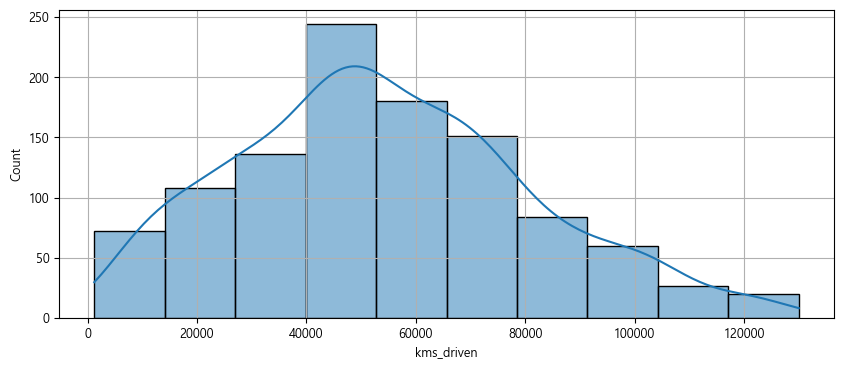

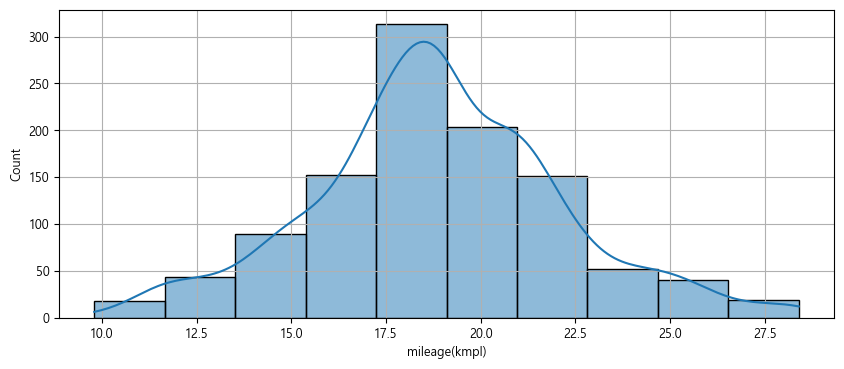

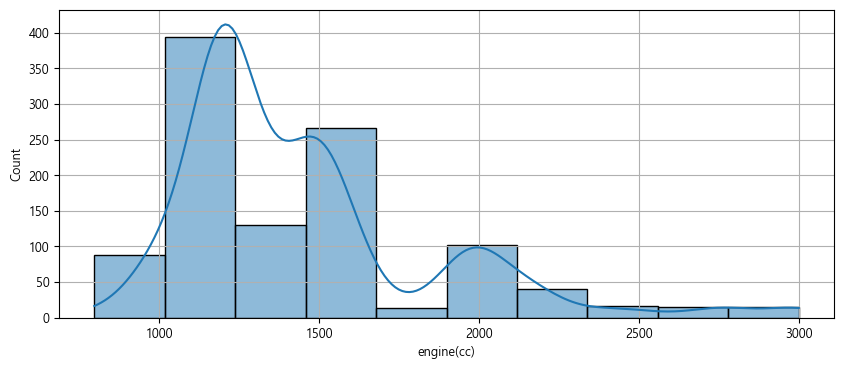

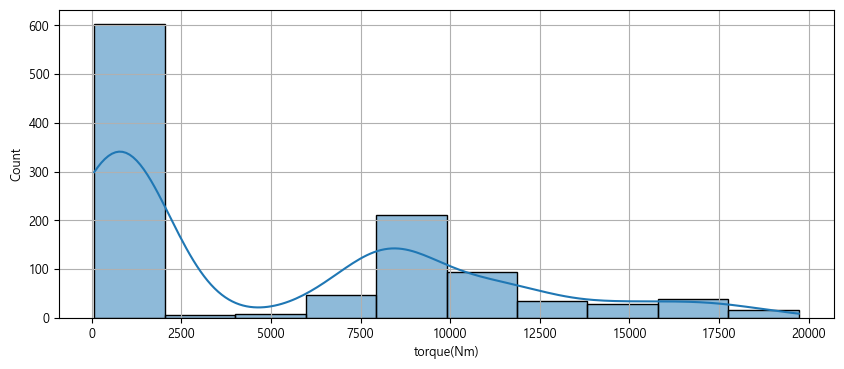

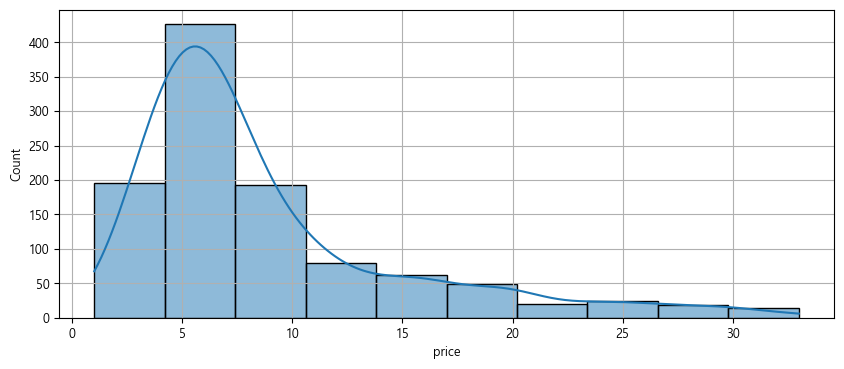

In [61]:
for c in ['kms_driven', 'mileage(kmpl)','engine(cc)','torque(Nm)','price']:
    my_histplot(df4, c, bins=10, dpi=100)


### [2] 변수간 상관관계 분석(산점도, heatmap, 카테고리타입 countplot)

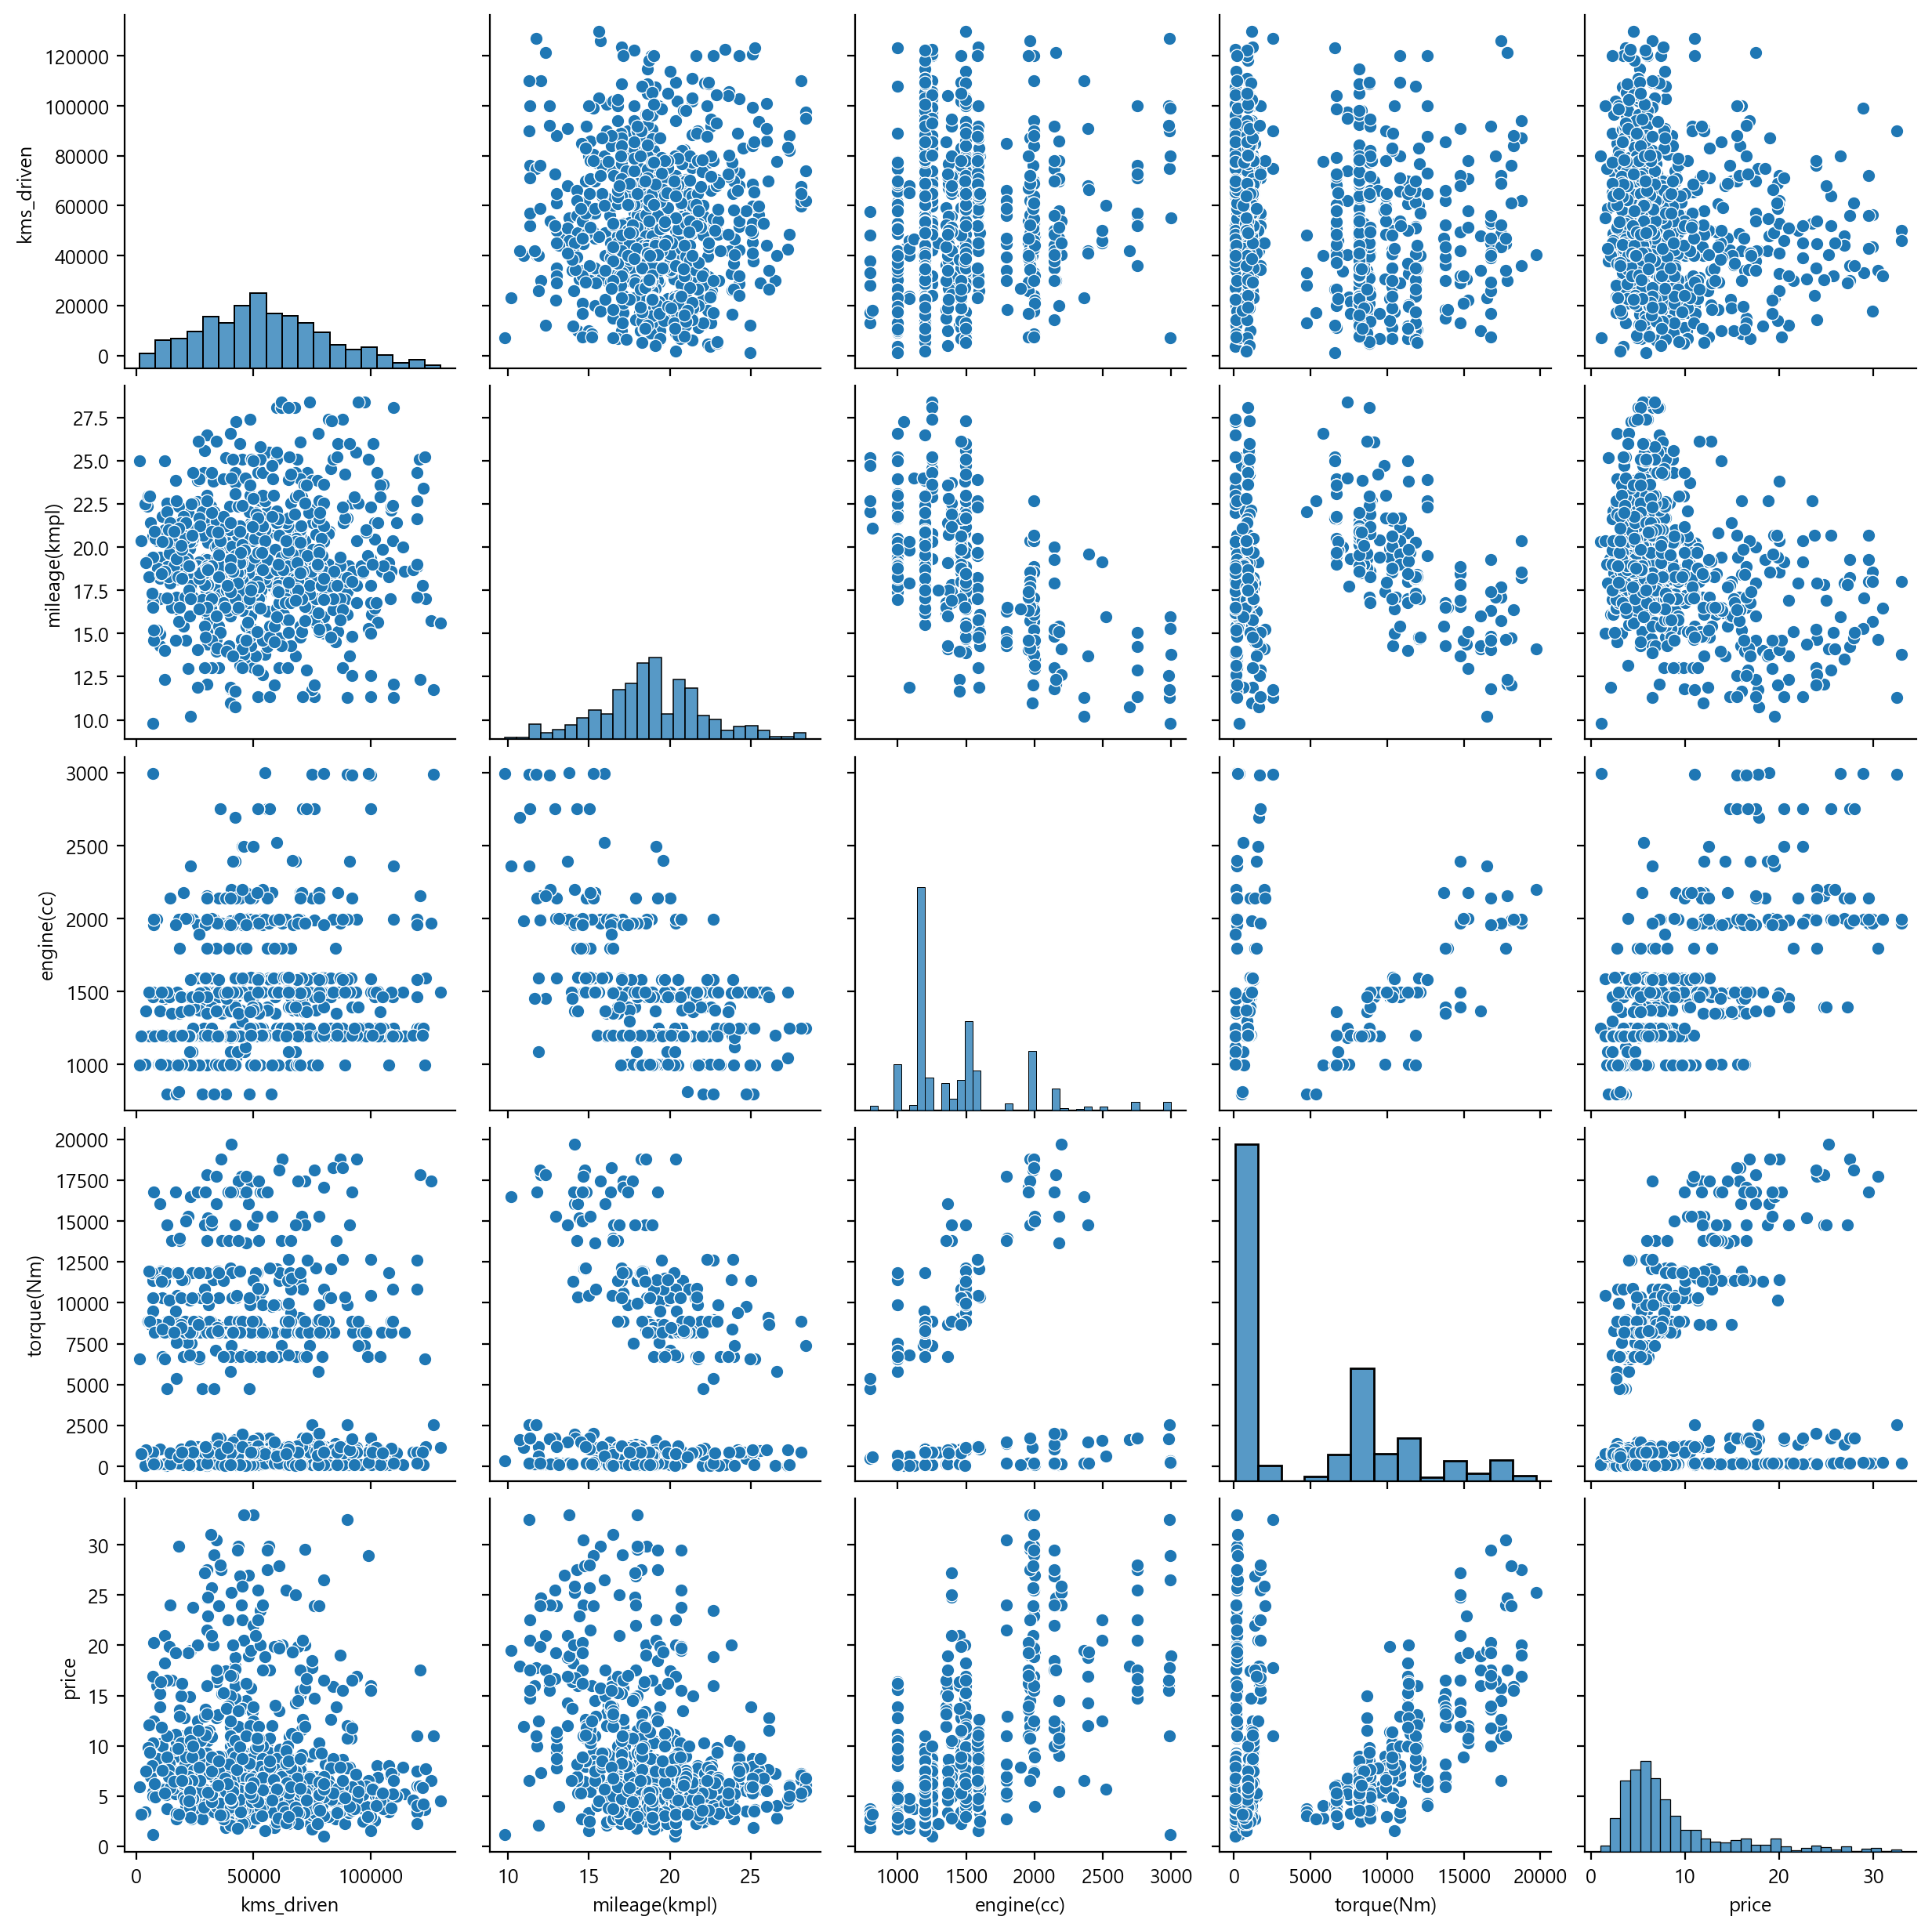

In [62]:
my_pairplot(df4[['kms_driven', 'mileage(kmpl)','engine(cc)','torque(Nm)','price']],dpi=100)

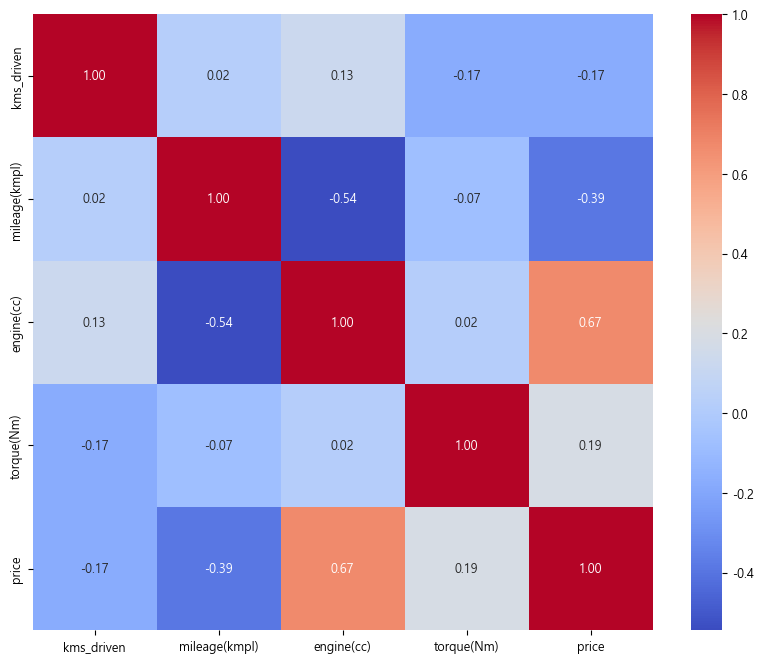

+---------------------------------+---------------+--------------+----------+
|                                 |   correlation |      p-value | result   |
|---------------------------------+---------------+--------------+----------|
| ('kms_driven', 'mileage(kmpl)') |     0.0249997 |     0.411571 | False    |
| ('kms_driven', 'engine(cc)')    |      0.128412 |  2.28883e-05 | True     |
| ('kms_driven', 'torque(Nm)')    |     -0.173684 |   9.0506e-09 | True     |
| ('kms_driven', 'price')         |     -0.171859 |  1.29817e-08 | True     |
| ('mileage(kmpl)', 'kms_driven') |     0.0249997 |     0.411571 | False    |
| ('mileage(kmpl)', 'engine(cc)') |     -0.544557 |  1.71036e-84 | True     |
| ('mileage(kmpl)', 'torque(Nm)') |     -0.074283 |    0.0145711 | True     |
| ('mileage(kmpl)', 'price')      |     -0.390507 |  1.05705e-40 | True     |
| ('engine(cc)', 'kms_driven')    |      0.128412 |  2.28883e-05 | True     |
| ('engine(cc)', 'mileage(kmpl)') |     -0.544557 |  1.71036e-84

In [63]:
my_correlation(df4[['kms_driven', 'mileage(kmpl)',	'engine(cc)','torque(Nm)','price']],dpi=100)


In [64]:
df4.to_excel('전처리완료.xlsx')

In [65]:
df4[df4.duplicated()]

,kms_driven,mileage(kmpl),engine(cc),torque(Nm),price,registration_year,insurance_validity,fuel_type,seats,ownsership,transmission,manufacturing_year
34,100525.0,16.10,1197.0,85.0,2.09,Oct-10,Comprehensive,Petrol,5,First Owner,Manual,2010
35,83000.0,18.00,1497.0,1173.0,6.25,Sep-15,Third Party insurance,Petrol,5,Second Owner,Automatic,2015
36,62152.0,18.53,1968.0,18774.0,20.00,Dec-15,Comprehensive,Diesel,5,First Owner,Automatic,2015
37,49000.0,15.29,1591.0,1213.0,8.35,Aug-17,Third Party insurance,Petrol,5,First Owner,Manual,2017
38,56215.0,21.40,1197.0,831.0,5.03,Aug-17,Comprehensive,Petrol,5,First Owner,Manual,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,23000.0,18.90,998.0,671.0,2.90,Jul-12,Comprehensive,Petrol,5,First Owner,Manual,2012
1047,1800.0,20.36,1197.0,789.0,3.15,Dec-13,Comprehensive,Petrol,5,First Owner,Manual,2013
1049,34000.0,16.00,1368.0,16077.0,17.50,May-19,Comprehensive,Petrol,5,First Owner,Automatic,2019
1050,30000.0,18.76,1462.0,10326.0,11.40,Jul-21,Zero Dep,Petrol,5,First Owner,Automatic,2021


### [3] 분산분석 통한 통제변수 설정

In [66]:
from helper.analysis import my_anova
categories = ['insurance_validity','seats','fuel_type','ownsership','transmission','manufacturing_year']

for c in categories:
    tmp = df4[[c, "price"]]
    my_anova(tmp, hue=c, target="price")

pingouin.anova
+----+--------------------+---------+------+---------+--------+-------------+----------+
|    | Source             |      SS |   DF |      MS |      F |       p-unc |      np2 |
|----+--------------------+---------+------+---------+--------+-------------+----------|
|  0 | insurance_validity | 1054.46 |    3 | 351.487 | 9.1923 | 5.23725e-06 | 0.024966 |
|  1 | Within             | 41181.4 | 1077 | 38.2371 |    nan |         nan |      nan |
+----+--------------------+---------+------+---------+--------+-------------+----------+

statsmodels.anova.anova_lm
+-----------------------+------+----------+-----------+---------+-------------+
|                       |   df |   sum_sq |   mean_sq |       F |      PR(>F) |
|-----------------------+------+----------+-----------+---------+-------------|
| C(insurance_validity) |    5 |  1309.92 |   261.985 | 6.85159 | 2.64423e-06 |
| Residual              | 1077 |  41181.4 |   38.2371 |     nan |         nan |
+----------------------

In [67]:
tmp = df4[['insurance_validity','fuel_type','price']]
my_anova(tmp, target="price", hue=['insurance_validity','fuel_type'])

pingouin.anova
+----+--------------------------------+-------------+------+-------------+--------------+----------+--------------+
|    | Source                         |          SS |   DF |          MS |            F |    p-unc |          np2 |
|----+--------------------------------+-------------+------+-------------+--------------+----------+--------------|
|  0 | insurance_validity             |   -1.05e-09 |    5 |    -2.1e-10 | -6.32207e-12 |        1 | -2.95148e-14 |
|  1 | fuel_type                      | 6.58688e-08 |    3 | 2.19563e-08 |  6.60996e-10 |        1 |  1.85153e-12 |
|  2 | insurance_validity * fuel_type |     133.057 |   15 |     8.87048 |     0.267047 | 0.605426 |   0.00372622 |
|  3 | Residual                       |     35575.3 | 1071 |     33.2169 |          nan |      nan |          nan |
+----+--------------------------------+-------------+------+-------------+--------------+----------+--------------+

statsmodels.anova.anova_lm
+----------------------------

c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not h

In [69]:
df4 = df4.drop('registration_year',axis=1)
my_pretty_table(df4)

+------+--------------+-----------------+--------------+--------------+---------+-----------------------+-------------+---------+--------------+----------------+----------------------+
|      |   kms_driven |   mileage(kmpl) |   engine(cc) |   torque(Nm) |   price | insurance_validity    | fuel_type   |   seats | ownsership   | transmission   |   manufacturing_year |
|------+--------------+-----------------+--------------+--------------+---------+-----------------------+-------------+---------+--------------+----------------+----------------------|
|    0 |        30615 |            17.4 |          999 |         9863 |    8.99 | Comprehensive         | Petrol      |       5 | First Owner  | Automatic      |                 2020 |
|    1 |        24000 |           20.68 |         1995 |          188 |   23.75 | Comprehensive         | Diesel      |       5 | First Owner  | Automatic      |                 2018 |
|    2 |        18378 |            16.5 |         1353 |        13808 |   1

In [70]:
for c in categories:
    my_pretty_table(DataFrame(df4[c].value_counts(), columns=[c]))

+-----------------------+----------------------+
|                       |   insurance_validity |
|-----------------------+----------------------|
| Comprehensive         |                  800 |
| Third Party insurance |                  208 |
| Third Party           |                   39 |
| Zero Dep              |                   34 |
| Not Available         |                    0 |
| Petrol                |                    0 |
+-----------------------+----------------------+
+-------+---------+
|       |   seats |
|-------+---------|
|     5 |     981 |
|     7 |      84 |
|     6 |       8 |
|     4 |       7 |
|     8 |       1 |
| 67000 |       0 |
+-------+---------+
+---------+-------------+
|         |   fuel_type |
|---------+-------------|
| Petrol  |         753 |
| Diesel  |         317 |
| CNG     |          11 |
| 5 Seats |           0 |
+---------+-------------+
+--------------+--------------+
|              |   ownsership |
|--------------+--------------|
| Firs

### [4] 교효작용에 대한 시각화 확인

## #05. 회귀분석 

### [1] 데이터 표준화

In [74]:
std_df = my_standard_scaler(df4, yname='price')
my_pretty_table(std_df.head())

+----+--------------+-----------------+--------------+--------------+-----------------------+-------------+---------+--------------+----------------+----------------------+---------+
|    |   kms_driven |   mileage(kmpl) |   engine(cc) |   torque(Nm) | insurance_validity    | fuel_type   |   seats | ownsership   | transmission   |   manufacturing_year |   price |
|----+--------------+-----------------+--------------+--------------+-----------------------+-------------+---------+--------------+----------------+----------------------+---------|
|  0 |    -0.877004 |        -0.44827 |     -1.12416 |     0.910636 | Comprehensive         | Petrol      |       5 | First Owner  | Automatic      |                 2020 |    8.99 |
|  1 |     -1.12433 |        0.548133 |      1.33355 |    -0.916017 | Comprehensive         | Diesel      |       5 | First Owner  | Automatic      |                 2018 |   23.75 |
|  2 |     -1.33453 |       -0.721673 |    -0.250639 |      1.65546 | Comprehensive  

### [2] 명목형 변수의 더미변수 추가

In [75]:
dummy_df = my_dummies(std_df)
my_pretty_table(dummy_df.head())
dummy_df.shape

+----+--------------+-----------------+--------------+--------------+---------+------------------------------------+-----------------------------+----------------------------------+--------------------------------------------+-------------------------------+-----------------+--------------------+--------------------+-----------+-----------+-----------+-----------+---------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+-------------------+----------------------+----------------------+---------------------+---------------------+--------------------------+--------------------------+---------------------------+--------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------

(1081, 69)

### [3] 데이터 분할(훈련용, 검정용)

In [76]:
x_train, x_test, y_train, y_test = my_train_test_split(dummy_df, yname='price',test_size=0.2 )
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((864, 68), (864,), (217, 68), (217,))

### [4] 회귀분석 시행

In [77]:
my_linear_regrassion(x_train, y_train, x_test, y_test,use_plot=False,resid_test=False)

[회귀식]
price = -0.788 * kms_driven + -0.638 * mileage(kmpl) + 3.330 * engine(cc) + 0.402 * torque(Nm) + -0.000 * insurance_validity_Not Available + -0.000 * insurance_validity_Petrol + -0.340 * insurance_validity_Third Party + -0.169 * insurance_validity_Third Party insurance + 2.412 * insurance_validity_Zero Dep + 0.685 * fuel_type_CNG + 0.714 * fuel_type_Diesel + -1.400 * fuel_type_Petrol + -3.120 * seats_5 + 0.062 * seats_6 + -6.106 * seats_7 + -8.938 * seats_8 + 0.000 * seats_67000 + -0.000 * ownsership_1199 cc + -0.000 * ownsership_1248 cc + 0.000 * ownsership_1451 cc + -0.000 * ownsership_1461 cc + 0.000 * ownsership_1497 cc + 0.000 * ownsership_1498 cc + -0.000 * ownsership_1950 cc + -0.000 * ownsership_1968 cc + -0.000 * ownsership_1984 cc + 0.000 * ownsership_1995 cc + -0.000 * ownsership_1996 cc + -0.000 * ownsership_1998 cc + -0.000 * ownsership_2013 + 0.000 * ownsership_2993 cc + 0.000 * ownsership_2999 cc + 0.000 * ownsership_998 cc + 0.000 * ownsership_999 cc + 0.000 * own

LinAlgError: Singular matrix